# Задача
### Рассчет из предыдущей лабы

In [1]:
import numpy as np

def Parallel(r1, r2):
    return r1 * r2 / (r1 + r2)

Up = 10
Ri = 7500
Rk1 = 15000
Rk2 = 1000
Rb = 330000
Re = 330
h21 = 100
Ut = 0.025


I2 = 0.005
Ie = (h21 + 1) * I2 * Re / Rb
re = Ut / Ie
k = Rk1 / re
h11 = (h21 + 1) * re
h11_Rb = Parallel(h11, Rb)
alpha = h11_Rb / (h11_Rb + Ri)
Ri_h11 = Parallel(Ri, h11)
betta = Ri_h11 / (Ri_h11 + Rb)
K_1 = alpha * np.abs(k) / (1 + betta * np.abs(k))
print("K_1 =", K_1)

### Текущая задача

In [3]:
import numpy as np

Ut = 0.025
Re = 510
L = 20 * 10**(-6)
C = 330 * 10**(-12)
Q = 75
w = 1 / (2 * np.pi * np.sqrt(L * C))
# Rk = complex(0, L / C * (1 / (w * C) - w * L))
Rk = np.sqrt(L / C) * Q
Ie = 0.00190514
betta = Re / Rk
print(Rk)

re = Ut / Ie
K = Rk / re
K_new = K / (1 + np.abs(K * betta))
print("K_1 =", K_new)


ro = np.sqrt(L / C)
Rek = ro * Q
Fr = 1 / (2 * np.pi * np.sqrt(L * C))
print("F0 =", Fr)
print("delta F =", Fr / Q)


18463.72364689991
K_1 = 35.2952269223347
F0 = 1959061.924191225
delta F = 26120.825655883


In [34]:
Rn = 22000
Z_LC = np.sqrt(L / C) * 75
R_new = Z_LC * Rn / (Z_LC + Rn)
K_kon = K_new / Z_LC * R_new

Q_kon = R_new / np.sqrt(L / C)
print(Q_kon)
print(Fr / Q_kon)


# r = np.sqrt(L / C) / Q
# print(L, C, r)
# print(L/C)
# Q2 = np.sqrt(L / C) / (r * Rn / (r + Rn))
# Q2 = np.sqrt(L / C) / (r + Rn)
print(K_kon)

40.77726544394322
48042.99412584104
19.189904494883375


# Обработка результатов

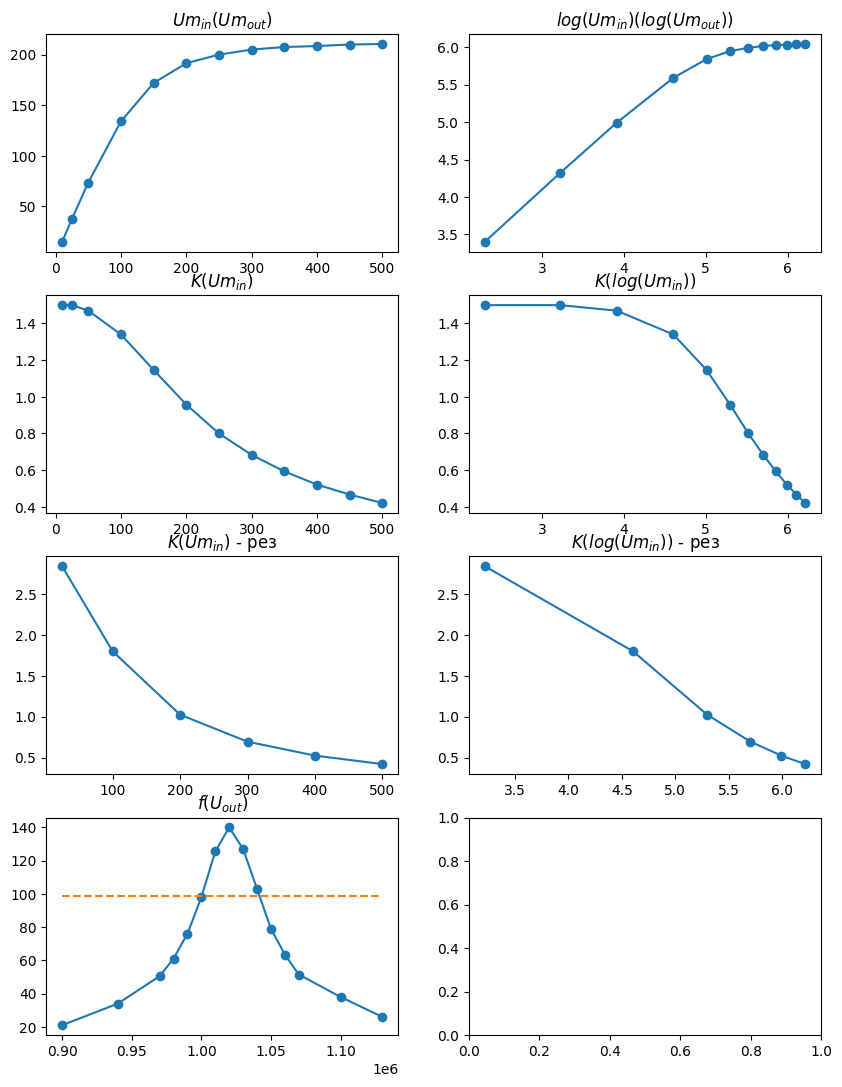

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#3 Амплитудная хар-ка на резонансе
df3 = pd.DataFrame()
df3['Um_in'] = [10, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 25]
df3['2Um_out'] = [30, 147, 268, 344, 383, 400, 410, 415, 417, 420, 421, 75]
df3['Um_out'] = df3['2Um_out'] / 2
df3['K'] = df3['Um_out'] / df3['Um_in']

#4 Резонансный коэффициент усиления
df4 = pd.DataFrame()
df4['Um_in'] = [25, 100, 200, 300, 400, 500]
df4['2Um_out'] = [142, 360, 410, 417, 420, 421]
df4['Um_out'] = df4['2Um_out'] / 2
df4['K'] = df4['Um_out'] / df4['Um_in']

#5 Um_in = 60mV
df5 = pd.DataFrame()
df5['f'] = [1.02, 1.03, 1.05, 1.07, 1.10, 1.13, 1.04, 1.01, 1.00, 0.99, 0.98, 0.97, 1.06, 0.94, 0.90]
df5 *= 1000000
df5['2Uout'] = [280, 254, 158, 103, 76, 52, 206, 251, 196, 152, 122, 101, 127, 68, 42]
df5['Uout'] = df5['2Uout'] / 2

df3 = df3.sort_values('Um_in')
df4 = df4.sort_values('Um_in')
df5 = df5.sort_values('f')

df3 = df3.reset_index(drop=True)
df4 = df4.reset_index(drop=True)
df5 = df5.reset_index(drop=True)

fig, axs = plt.subplots(4, 2, figsize=(10, 13))
axs[0][0].plot(df3['Um_in'], df3['Um_out'], '-o')
axs[0][0].set(title='$Um_{in}(Um_{out})$')
axs[0][1].plot(np.log(df3['Um_in']), np.log(df3['2Um_out']), '-o')
axs[0][1].set(title='$log(Um_{in})(log(Um_{out}))$')

axs[1][0].plot(df3['Um_in'], df3['K'], '-o')
axs[1][0].set(title='$K(Um_{in})$')
axs[1][1].plot(np.log(df3['Um_in']), df3['K'], '-o')
# axs[1][1].plot(df3['Um_in'], np.log(df3['K']), '-o')
axs[1][1].set(title='$K(log(Um_{in}))$')

axs[2][0].plot(df4['Um_in'], df4['K'], '-o')
axs[2][0].set(title='$K(Um_{in})$ - рез')
axs[2][1].plot(np.log(df4['Um_in']), df4['K'], '-o')
axs[2][1].set(title='$K(log(Um_{in}))$ - рез')

axs[3][0].plot(df5['f'], df5['Uout'], '-o')
axs[3][0].set(title='$f(U_{out})$')
axs[3][0].plot(df5['f'], [1 / np.sqrt(2) * np.max(df5['Uout'])] * len(df5['f']), linestyle='dashed')


In [96]:
level = 1 / np.sqrt(2) * np.max(df5['Uout'])
print('level =', level)

def find_intersection(i):
    delta_x = df5['f'][i+1] - df5['f'][i]
    delta_y = df5['Uout'][i+1] - df5['Uout'][i]
    x0 = df5['f'][i]
    y0 = df5['Uout'][i]

    new_delta_y = level - y0
    new_delta_x = delta_x / delta_y * new_delta_y

    x = x0 + new_delta_x
    y = y0 + new_delta_y

    print('(x, y) =', x, y)


for i in range(len(df5['f']) - 1):
    if df5['Uout'][i] <= level and df5['Uout'][i+1] >= level:
        print(i, df5['Uout'][i], df5['Uout'][i+1])
        find_intersection(i)
    if df5['Uout'][i] >= level and df5['Uout'][i+1] <= level:
        print(i, df5['Uout'][i], df5['Uout'][i+1])
        find_intersection(i)

level = 98.99494936611664
5 98.0 125.5
(x, y) = 1000361.799769497 98.99494936611664
9 103.0 79.0
(x, y) = 1041668.7710974514 98.99494936611664


In [99]:
delta_f = 1041669 - 1000362
print('delta f =', delta_f)
f = np.max(df5['f'])
Q = f / delta_f
print('Q =', Q)

delta f = 41307
Q = 27.35613818481129
